In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORTING DATA SET

In [4]:
df = pd.read_csv('GRE_Reg_Data.csv')

In [5]:
df.head()

,REGISTRATION_NO,Date Registered,DATE OF EXAM OCC,TIME OCC,Age,Sex
0,221412410,6/15/2022,11/12/2020,1700,0,NaN
1,220314085,7/22/2022,5/12/2020,1110,27,F
2,222013040,8/6/2022,6/4/2020,1620,60,M
3,220614831,8/18/2022,8/17/2020,1200,28,M
4,231207725,2/27/2023,1/27/2020,635,37,M


In [6]:
df.shape

(247988, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247988 entries, 0 to 247987
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   REGISTRATION_NO   247988 non-null  int64 
 1   Date Registered   247988 non-null  object
 2   DATE OF EXAM OCC  247988 non-null  object
 3   TIME OCC          247988 non-null  int64 
 4   Age               247988 non-null  int64 
 5   Sex               215740 non-null  object
dtypes: int64(3), object(3)
memory usage: 11.4+ MB


## CHECKING NULL VALUES

## NOTE - FROM GIVEN ASSAIGNMENT WE DOESNOT HAVE ANY RECQUIREMENT OF "SEX" COLUMN SO WE ARE INGORNING IT PRESENTLY

In [8]:
df.isnull().sum()

REGISTRATION_NO         0
Date Registered         0
DATE OF EXAM OCC        0
TIME OCC                0
Age                     0
Sex                 32248
dtype: int64

In [9]:
df['Sex'].value_counts()

Sex
M    101028
F     90804
X     23877
H        30
-         1
Name: count, dtype: int64

## Which hour has the highest frequency of candidates scheduled to take up exams? Show the plot diagram of the frequencies.

### CHANGING TIME FORMAT FROM '1000' INTO '10.00'

In [10]:
df['TIME OCC'] = df['TIME OCC'].apply(lambda x: str(x).zfill(4))

# Convert to datetime object
df['TIME OCC'] = pd.to_datetime(df['TIME OCC'], format='%H%M')

# Format to 24-hour time with decimal point
df['TIME OCC'] = df['TIME OCC'].dt.strftime('%H.%M')

In [11]:
df

,REGISTRATION_NO,Date Registered,DATE OF EXAM OCC,TIME OCC,Age,Sex
0,221412410,6/15/2022,11/12/2020,17.00,0,NaN
1,220314085,7/22/2022,5/12/2020,11.10,27,F
2,222013040,8/6/2022,6/4/2020,16.20,60,M
3,220614831,8/18/2022,8/17/2020,12.00,28,M
4,231207725,2/27/2023,1/27/2020,06.35,37,M
...,...,...,...,...,...,...
247983,231510379,5/29/2023,5/25/2023,11.00,25,M
247984,231604807,1/27/2023,1/26/2023,18.00,23,M
247985,231606525,3/22/2023,3/22/2023,10.00,25,F
247986,231210064,4/12/2023,4/12/2023,16.30,29,M


In [13]:
df['hour'] = df['TIME OCC'].apply(lambda x: int(str(x).split('.')[0]))

In [14]:
df

,REGISTRATION_NO,Date Registered,DATE OF EXAM OCC,TIME OCC,Age,Sex,hour
0,221412410,6/15/2022,11/12/2020,17.00,0,NaN,17
1,220314085,7/22/2022,5/12/2020,11.10,27,F,11
2,222013040,8/6/2022,6/4/2020,16.20,60,M,16
3,220614831,8/18/2022,8/17/2020,12.00,28,M,12
4,231207725,2/27/2023,1/27/2020,06.35,37,M,6
...,...,...,...,...,...,...,...
247983,231510379,5/29/2023,5/25/2023,11.00,25,M,11
247984,231604807,1/27/2023,1/26/2023,18.00,23,M,18
247985,231606525,3/22/2023,3/22/2023,10.00,25,F,10
247986,231210064,4/12/2023,4/12/2023,16.30,29,M,16


## REQUIRED PLOT TO SHOW HIGHEST FREQUENCY OF HOUR WHERE CANDIDATE TOOK EXAM

<Axes: xlabel='hour'>

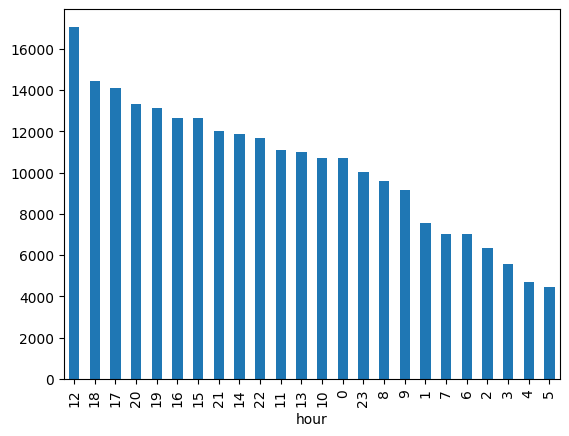

In [15]:
df['hour'].value_counts().plot(kind = 'bar')

## Conclusion - 
### 12th hour (time between 12.00 to 12.59) has the highest frequency of candidates scheduled to take up the exam

## 2 . Create stacked bar graph of the number of candidates taken exam both at day and night (Day being 06:00 AM to 09:00 PM)

In [16]:
def convert_into_period(t):
    if 6.00 <= t <= 21.00:
        return 'Day'
    else:
        return 'Night'
df['TIME OCC'] = df['TIME OCC'].astype('float')
df['period'] = df['TIME OCC'].apply(convert_into_period)

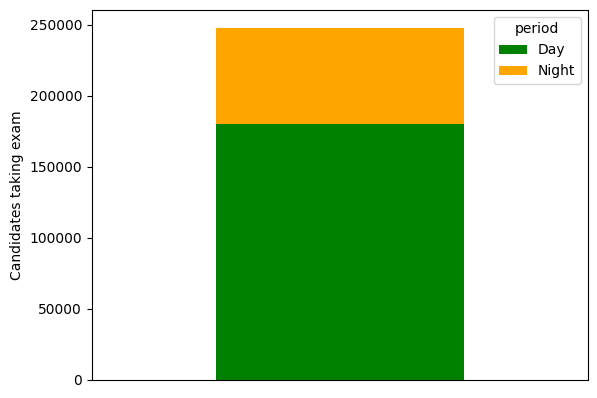

In [20]:
fig, ax = plt.subplots()
df['period'].value_counts().to_frame().T.plot(kind='bar', stacked=True, ax=ax, color=['green', 'orange'])

ax.set_xticks([])

plt.ylabel('Candidates taking exam')
plt.show()


## CONCLUSION - 
### From above graph we can conclude that Most of the Candidates exams are scheduled in Day

## Identify the number of candidates scheduled to write exam in different age groups, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of candidates scheduled as the values.

In [24]:
b = [0, 17, 25, 34, 44, 54, 64, float('inf')]
l = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]
df['Age Group'] = pd.cut(df['Age'], bins=b, labels=l, right=False)

In [25]:
df

,REGISTRATION_NO,Date Registered,DATE OF EXAM OCC,TIME OCC,Age,Sex,hour,period,Age Group
0,221412410,6/15/2022,11/12/2020,17.00,0,NaN,17,Day,0-17
1,220314085,7/22/2022,5/12/2020,11.10,27,F,11,Day,26-34
2,222013040,8/6/2022,6/4/2020,16.20,60,M,16,Day,55-64
3,220614831,8/18/2022,8/17/2020,12.00,28,M,12,Day,26-34
4,231207725,2/27/2023,1/27/2020,6.35,37,M,6,Day,35-44
...,...,...,...,...,...,...,...,...,...
247983,231510379,5/29/2023,5/25/2023,11.00,25,M,11,Day,26-34
247984,231604807,1/27/2023,1/26/2023,18.00,23,M,18,Day,18-25
247985,231606525,3/22/2023,3/22/2023,10.00,25,F,10,Day,26-34
247986,231210064,4/12/2023,4/12/2023,16.30,29,M,16,Day,26-34


<Axes: xlabel='Age Group'>

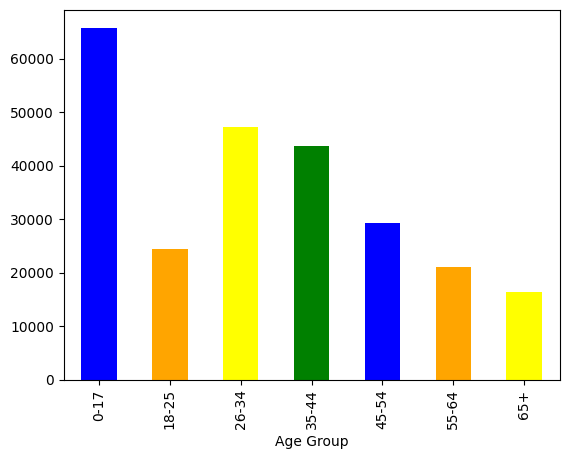

In [26]:
df['Age Group'].value_counts().sort_index().plot(kind = 'bar', color = ['blue', 'orange', 'yellow', 'green'])

## CONCLUSION
### From above graph we can say that Most Candidates who are scheduled to take exams has age between 0-17 